# 1. Introduction

A brief description of your approach to the problem and the results that you 
have obtained on the training data.

\*Insert Introduction here\*

# 2. Data Import

This section is how you import the data into the notebook. It should be written in such 
a way that I can modify it to run on my own machine by simply changing the location 
of the training data and any additional data sources that you have used.

In [5]:
# I intend to use Data Frames to hold our data for now. When putting it in the model,
# I will probably have to change it to another format later but that is a problem for future me, not current me
# (Im joking; please dont deduct points, Mr/Ms Marker)
# Seriously though, Data Frames have very good performance and are malleable for data investigation,
# hence my decision to use them.

import pandas as pd
from pandas import DataFrame as df
import csv

def dataframe_from_diabetic_data_csv(csv_filepath):
    return pd.read_csv(csv_filepath)

TRAINING_DATA_FILEPATH = "BENG0095 (202425) Group Coursework Brief-20251122/Dataset/diabetic_data_training.csv"
TEST_DATA_FILEPATH = "BENG0095 (202425) Group Coursework Brief-20251122/Dataset/diabetic_data_test.csv"

training_data = dataframe_from_diabetic_data_csv(TRAINING_DATA_FILEPATH)
test_data = dataframe_from_diabetic_data_csv(TEST_DATA_FILEPATH)

print(training_data)



       encounter_id  patient_nbr             race  gender      age weight  \
0            149190     55629189        Caucasian  Female  [10-20)      ?   
1             64410     86047875  AfricanAmerican  Female  [20-30)      ?   
2            500364     82442376        Caucasian    Male  [30-40)      ?   
3             16680     42519267        Caucasian    Male  [40-50)      ?   
4             35754     82637451        Caucasian    Male  [50-60)      ?   
...             ...          ...              ...     ...      ...    ...   
91584     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
91585     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
91586     443854148     41088789        Caucasian    Male  [70-80)      ?   
91587     443857166     31693671        Caucasian  Female  [80-90)      ?   
91588     443867222    175429310        Caucasian    Male  [70-80)      ?   

       admission_type_id  discharge_disposition_id  admission_source_id  \


# 3. Data Transformation and Exploration
Code for the equivalent section in your report, together with in-line documentation of 
that code.

In [6]:
# I'm going to create some helper functions that might become useful in future.
# Using a few dictionaries I'll allow for mapping from discharge IDs, admission type IDs,
# and admission source IDs, to their true meaning


id_mapping_file_path = "BENG0095 (202425) Group Coursework Brief-20251122/Dataset/IDS_mapping.csv"
admission_type_ids = {}
discharge_ids = {}
admission_source_ids = {}

with open(id_mapping_file_path, newline = '') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in csvreader:
        if row[0] == 'admission_type_id':
            current_dictionary = 'AT'
        elif row[0] == 'discharge_disposition_id':
            current_dictionary = 'DD'
        elif row[0] == 'admission_source_id':
            current_dictionary = 'AS'
        elif row[0] == '':
            continue
        elif current_dictionary == 'AT':
            admission_type_ids[int(row[0])] = row[1]
        elif current_dictionary == 'DD':
            discharge_ids[int(row[0])] = row[1]
        else:
            admission_source_ids[int(row[0])] = row[1]
        
def get_admission_type(admission_type_id):
    try:
        return admission_type_ids[admission_type_id]
    except:
        return 'INVALID ADMISSION TYPE ID'

def get_discharge_type(discharge_id):
    try:
        return discharge_ids[discharge_id]
    except:
        return 'INVALID DISCHARGE ID'

def get_admission_source_ids(admission_source_id):
    try:
        return admission_source_ids[admission_source_id]
    except:
        return 'INVALID ADMISSION SOURCE ID'

#print(admission_type_ids)
#print(discharge_ids)
#print(admission_source_ids)

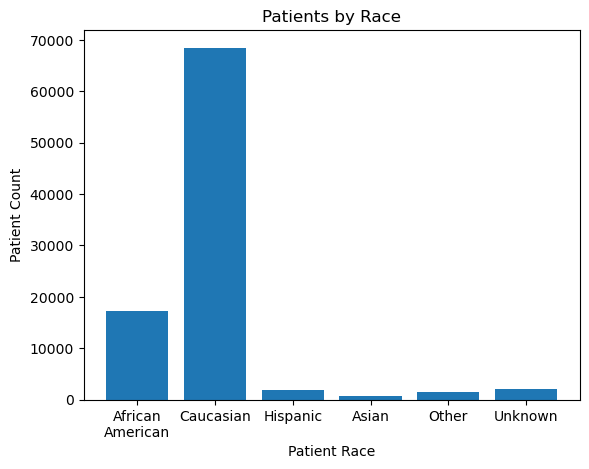

In [ ]:
# I want to create some data visualisations that can provide some insights.
# I intend to use these insights to inform how I set up the model's architecture

import matplotlib
from matplotlib import pyplot as plt

# Grouping Patients by Race
african_americans = training_data[training_data['race']=='AfricanAmerican']
african_american_patients = len(african_americans)

caucasians = training_data[training_data['race'] == 'Caucasian']
caucasian_patients = len(caucasians)

hispanics = training_data[training_data['race'] == 'Hispanic']
hispanic_patients = len(hispanics)

asians = training_data[training_data['race'] == 'Asian']
asian_patients = len(asians)

others = training_data[training_data['race'] == 'Other']
other_race_patients = len(others)

unknowns = training_data[training_data['race'] == '?']
unknown_race_patients = len(unknowns)

races = ['African\nAmerican', 'Caucasian', 'Hispanic', 'Asian', 'Other', 'Unknown']
patient_counts = [african_american_patients, caucasian_patients, hispanic_patients, asian_patients, other_race_patients, unknown_race_patients]

plt.bar(races, patient_counts)
plt.title("Patients by Race")
plt.xlabel("Patient Race")
plt.ylabel("Patient Count")
plt.show()

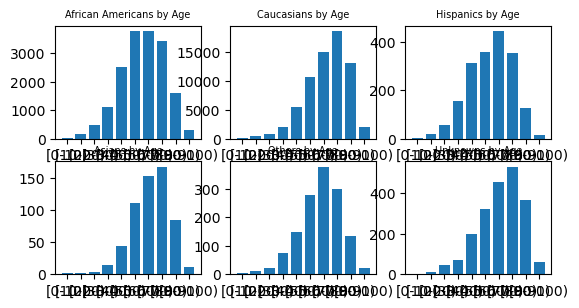

In [ ]:
# Grouping patients by age
# '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)' '[80-90)' '[90-100)' '[0-10)'
age_brackets = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']

african_americans_by_age = [len(african_americans[african_americans['age'] == bracket]) for bracket in age_brackets]
caucasians_by_age = [len(caucasians[caucasians['age'] == bracket]) for bracket in age_brackets]
hispanics_by_age = [len(hispanics[hispanics['age'] == bracket]) for bracket in age_brackets]
asians_by_age = [len(asians[asians['age'] == bracket]) for bracket in age_brackets]
others_by_age = [len(others[others['age'] == bracket]) for bracket in age_brackets]
unknowns_by_age = [len(unknowns[unknowns['age'] == bracket]) for bracket in age_brackets]

plt.bar(age_brackets, african_americans_by_age)
plt.show()

plt.bar(age_brackets, caucasians_by_age)
plt.show()

# african_american_axes = plt.subplot(3, 3, 1)
# african_american_axes.bar(age_brackets, african_americans_by_age)
# african_american_axes.set_title('African Americans by Age', fontsize = 7)


# caucasian_axes = plt.subplot(3, 3, 2)
# caucasian_axes.bar(age_brackets, caucasians_by_age)
# caucasian_axes.set_title('Caucasians by Age', fontsize = 7)


# hispanic_axes = plt.subplot(3, 3, 3)
# hispanic_axes.bar(age_brackets, hispanics_by_age)
# hispanic_axes.set_title('Hispanics by Age', fontsize = 7)


# asian_axes = plt.subplot(3, 3, 4)
# asian_axes.bar(age_brackets, asians_by_age)
# asian_axes.set_title('Asians by Age', fontsize = 7)


# other_axes = plt.subplot(3, 3, 5)
# other_axes.bar(age_brackets, others_by_age)
# other_axes.set_title('Others by Age', fontsize = 7)


# unknown_axes = plt.subplot(3, 3, 6)
# unknown_axes.bar(age_brackets, unknowns_by_age)
# unknown_axes.set_title('Unknowns by Age', fontsize = 7)


# plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

# plt.show()



# 4. Methodology Overview
Code for the equivalent section in your report, together with in-line documentation of 
that code.

# 5. Model Training & Validation
Code for the equivalent section in your report, together with in-line documentation of 
that code.

# 6. Results
Code for the equivalent section in your report, together with in-line documentation of 
that code.

# 7. Final Predictions on Test Set
Code for the equivalent section in your report, together with in-line documentation of 
that code.